# Agrupamento utilizando o KMeans

In [1]:
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 

auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [3]:
# Baixa os dados de treinamento
link = 'https://drive.google.com/file/d/1MW2DeWGKj0fJIIWNN1SWu0vyXUVWj0UU/view?usp=sharing'
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('house prices train.csv')
df = pd.read_csv('house prices train.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.set_index('CustomerID',inplace=True)#novo index será o id do customer

In [6]:
df.columns = ['genero','idade','renda_anual','nivel_gastos']#traduzindo as colunas para facilitar o conhecimento

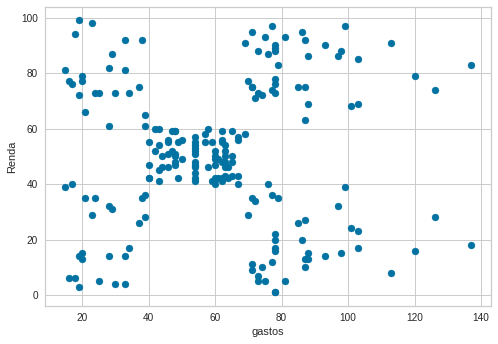

In [7]:
plt.scatter(df.renda_anual, df.nivel_gastos)#grafico de pontos sobre Renda no y e gastos no x
plt.ylabel('Renda')
plt.xlabel('gastos')
plt.show()

In [8]:
df_new = df[['renda_anual', 'nivel_gastos']]#filtrando apenas a renda e gastos

In [9]:
x = df_new.values

### Buscar o número de clusterização
nesse caso é facil de ver porém na maioria das vezes pode ser que não seja

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

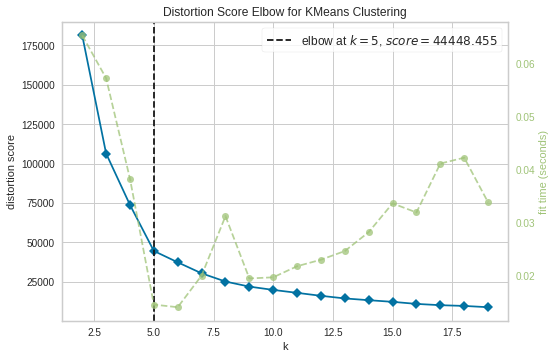

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), timing=True)
visualizer.fit(x)
visualizer.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

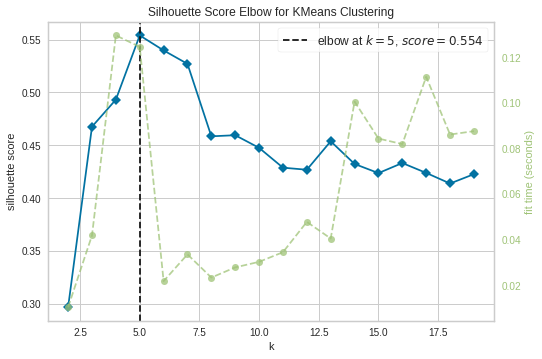

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
# Silhouette method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette' ,timing=True)
visualizer.fit(x)
visualizer.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

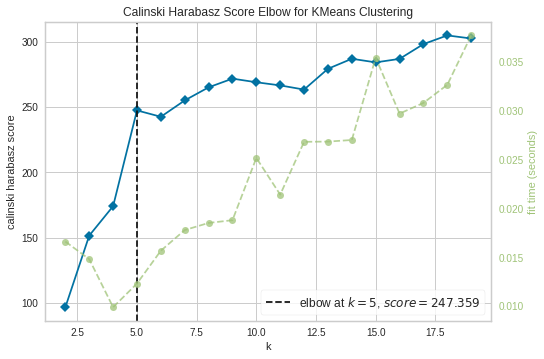

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [12]:
# calinski_harabasz method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz' ,timing=True)
visualizer.fit(x)
visualizer.show()

### Treinar o modelo de Agrupamento

In [13]:
kmeans_final = KMeans(n_clusters=5)
kmeans_final.fit(x)
cluster_pred = kmeans_final.predict(x)
cluster_center = kmeans_final.cluster_centers_
cluster_center

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

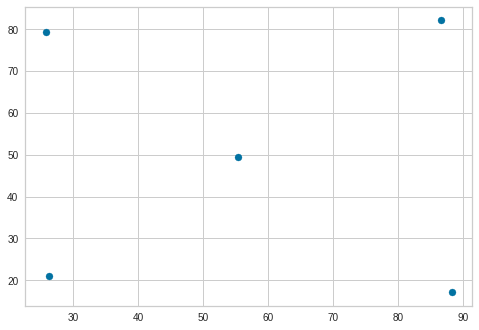

In [14]:
plt.scatter(cluster_center[:,0], cluster_center[:,1])
plt.show()

### plot modelo

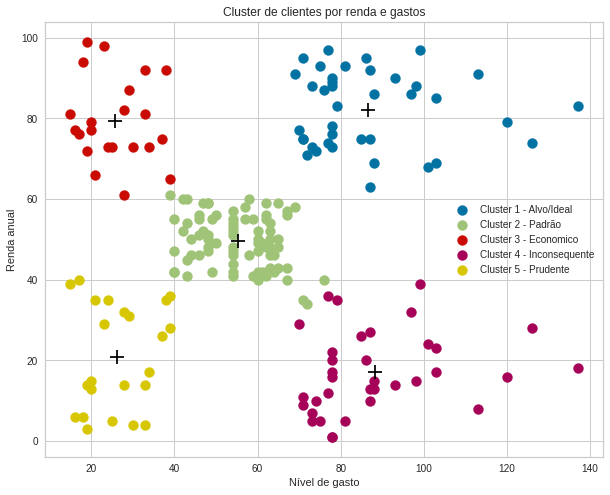

In [16]:
plt.figure(figsize=(10,8))
plt.scatter(x[cluster_pred==0,0], x[cluster_pred==0,1],s=100, label='Cluster 1 - Alvo/Ideal')
plt.scatter(x[cluster_pred==1,0], x[cluster_pred==1,1],s=100, label='Cluster 2 - Padrão')
plt.scatter(x[cluster_pred==2,0], x[cluster_pred==2,1],s=100, label='Cluster 3 - Economico')
plt.scatter(x[cluster_pred==3,0], x[cluster_pred==3,1],s=100, label='Cluster 4 - Inconsequente')
plt.scatter(x[cluster_pred==4,0], x[cluster_pred==4,1],s=100, label='Cluster 5 - Prudente')
plt.scatter(cluster_center[:,0], cluster_center[:,1], marker='+', s=200, c='black')
plt.legend()
plt.title('Cluster de clientes por renda e gastos')
plt.xlabel('Nível de gasto')
plt.ylabel('Renda anual')
plt.show()